<a href="https://colab.research.google.com/github/NurEser/MPA-MLF/blob/main/LAB04_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
# Defined 3 points in 2D-space:
X=np.array([[2, 1, 0],[4, 3, 0]])
# Calculate the covariance matrix:

R = np.matmul(X,X.T)/3

# Calculate the SVD decomposition and new basis vectors:
[U,D,V]=np.linalg.svd(R)  # call SVD decomposition
u1=U[:,0] # new basis vectors
u2=U[:,1]

# Calculate the coordinates in new orthonormal basis:

Xi1 = np.matmul(np.transpose(X), u1)
Xi2 = np.matmul(np.transpose(X), u2)

# Calculate the approximation of the original from new basis
#print(Xi1[:,None]) # add second dimention to array and test it
Xaprox = np.matmul(u1[:,None], Xi1[None,:])

# Check that you got the original


In [3]:
# Load Iris dataset as in the last PC lab:
from sklearn.datasets import load_iris
iris=load_iris()
iris.feature_names
print(iris.feature_names)
print(iris.data[0:5,:])
print(iris.target[:])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


<function matplotlib.pyplot.show(close=None, block=None)>

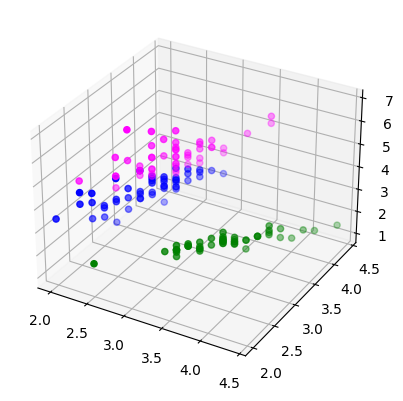

In [4]:

# We have 4 dimensions of data, plot the first three colums in 3D
X=iris.data
y=iris.target
import matplotlib.pyplot as plt
axes1=plt.axes(projection='3d')
axes1.scatter3D(X[y==0,1],X[y==0,1],X[y==0,2],color='green')
axes1.scatter3D(X[y==1,1],X[y==1,1],X[y==1,2],color='blue')
axes1.scatter3D(X[y==2,1],X[y==2,1],X[y==2,2],color='magenta')
plt.show


[[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]


<function matplotlib.pyplot.show(close=None, block=None)>

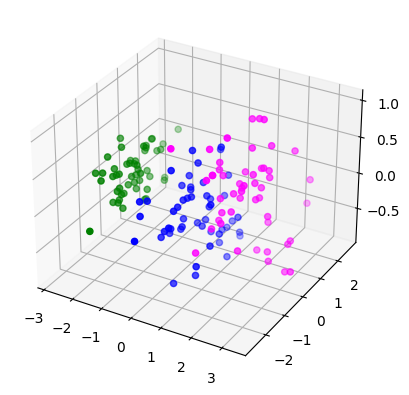

In [5]:

# Pre-processing is an important step, you can try either StandardScaler (zero mean, unit variance of features)
# or MinMaxScaler (to interval from 0 to 1)
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
Xscaler = StandardScaler()
Xpp=Xscaler.fit_transform(X)

from sklearn import decomposition
# define PCA object (three components), fit and transform the data
pca = decomposition.PCA(n_components=3)
pca.fit(Xpp)
Xpca = pca.transform(Xpp)
print(pca.get_covariance())
# you can plot the transformed feature space in 3D:
axes2=plt.axes(projection='3d')
axes2.scatter3D(Xpca[y==0,0],Xpca[y==0,1],Xpca[y==0,2],color='green')
axes2.scatter3D(Xpca[y==1,0],Xpca[y==1,1],Xpca[y==1,2],color='blue')
axes2.scatter3D(Xpca[y==2,0],Xpca[y==2,1],Xpca[y==2,2],color='magenta')
plt.show



In [6]:
# Compute pca.explained_variance_ and pca.explained_cariance_ratio_values
pca.explained_variance_


array([2.93808505, 0.9201649 , 0.14774182])

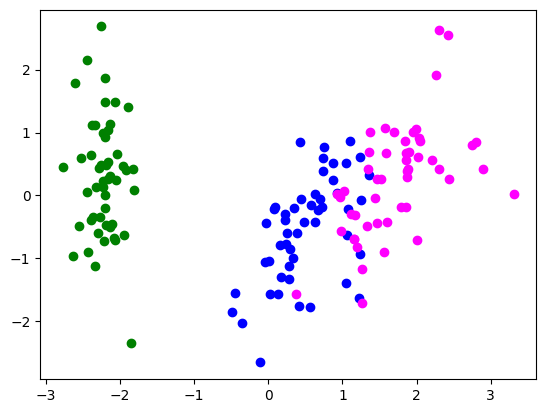

In [7]:
plt.scatter(Xpca[y == 0,0], Xpca[ y== 0, 1], color = 'green')
plt.scatter(Xpca[y == 1,0], Xpca[ y== 1, 1], color = 'blue')
plt.scatter(Xpca[y == 2,0], Xpca[ y== 2, 1], color = 'magenta')

In [8]:
#apply knn on Xpp, Xpca , Xpca with only first and second feature, then 2nd and 3rd

(105, 4)
(45, 4)


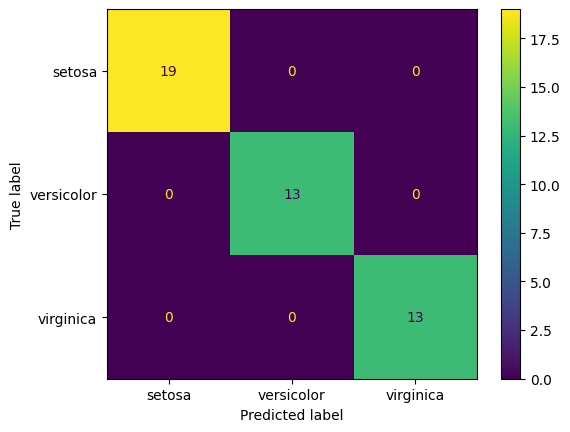

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train , y_test =train_test_split(X,y,test_size = 0.3 , random_state =42)
print(X_train.shape)
print(X_test.shape)
knn1=KNeighborsClassifier(n_neighbors = 3)
knn1.fit(X_train,y_train)
Ypred=knn1.predict(X_test)
# Import and show confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test,Ypred)
ConfusionMatrixDisplay(cm, display_labels=iris.target_names).plot()

In [10]:
# Now do the same (data set split, KNN, confusion matrix), but for PCA-transformed data (1st two principal components, i.e., first two columns).
# Compare the results with full dataset

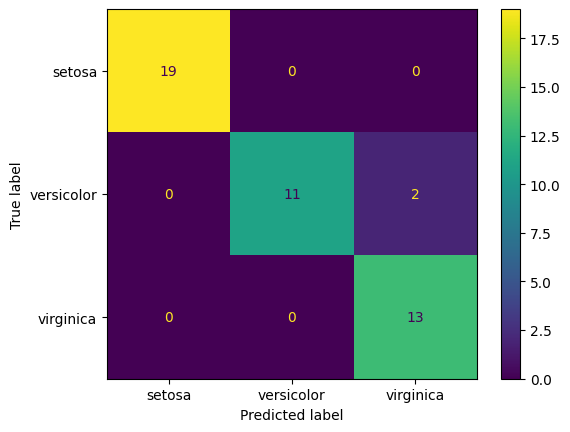

In [11]:
# PCA-transformed data (1st two principal components
Xpca_2d = Xpca[:, :2]
Xpca_train, Xpca_test, ypca_train, ypca_test = train_test_split(Xpca_2d, y, test_size=0.3, random_state=42)
knn2 = KNeighborsClassifier(n_neighbors=3)
knn2.fit(Xpca_train, ypca_train)
ypca_pred = knn2.predict(Xpca_test)
cm_pca = confusion_matrix(ypca_test, ypca_pred)
ConfusionMatrixDisplay(cm_pca, display_labels=iris.target_names).plot()

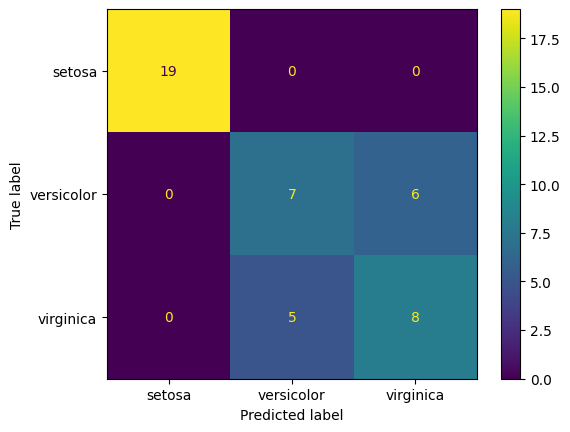

In [12]:
#Original dataset using only the first two dimensions
X_2d = X[:, :2]
X2d_train, X2d_test, y2d_train, y2d_test = train_test_split(X_2d, y, test_size=0.3, random_state=42)
knn3 = KNeighborsClassifier(n_neighbors=3)
knn3.fit(X2d_train, y2d_train)
y2d_pred = knn3.predict(X2d_test)
cm_2d = confusion_matrix(y2d_test, y2d_pred)
ConfusionMatrixDisplay(cm_2d, display_labels=iris.target_names).plot()


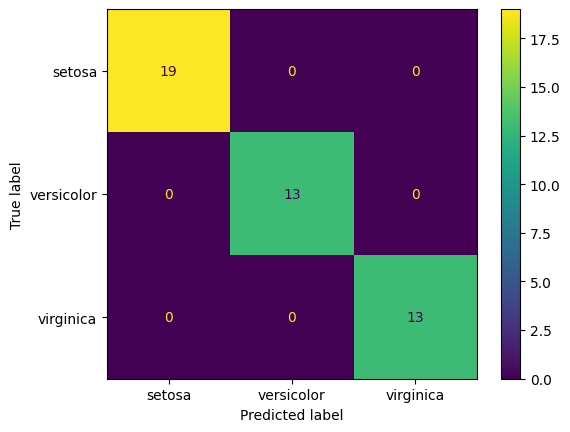

In [14]:
#Test on preprocessed dataset Xpp
Xpp_train, Xpp_test, ypp_train, ypp_test = train_test_split(Xpp, y, test_size=0.3, random_state=42)
knn_pp = KNeighborsClassifier(n_neighbors=3)
knn_pp.fit(Xpp_train, ypp_train)
ypp_pred = knn_pp.predict(Xpp_test)
cm_pp = confusion_matrix(ypp_test, ypp_pred)
ConfusionMatrixDisplay(cm_pp, display_labels=iris.target_names).plot()
